### 연결선물 데이터 생성
1. 종목(월물) 30분 OHLC 데이터: rawminute.db
2. 차월물의 거래량이 최근 2 거래일 연속 많으면 액티브 월물 변경
3. 가격 보정 방식: + 최근 2거래일 가격데이터의 차

In [1]:
import os, sys, pickle
sys.path.append('../')
sys.path.append('../scripts')
sys.path.append('../data')
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from models import OHLC, Products, Product, ConnectDate
from tools import ohlc_chart, view

In [2]:
""" DB 로드"""
products = pickle.load(open('../data/products.pkl', 'rb')) #종목정보
#db = tb.open_file('../data/futures.db', mode='r')
#filters = tb.Filters(complib='blosc', complevel=9)
#db = tb.open_file('../data/ohlc.db', mode='a', filters=filters) #분데이터 db 로드

In [3]:
""" 연결선물 데이터 생성: futures.db"""
products.create_continuous_contracts()

Updating Continuous Futures Data on Australian Dollar[AD]
Australian Dollar[AD] Data has been changed up by 0.001 at 2019-03-15T17:30:00
Updating Continuous Futures Data on British Pound[BP]
British Pound[BP] Data has been changed up by 0.006 at 2019-03-15T23:00:00
Updating Continuous Futures Data on Brazilian Real[BR]
Brazilian Real[BR] Data has been changed up by -0.0006 at 2019-02-28T00:30:00
Brazilian Real[BR] Data has been changed up by -0.0009 at 2019-03-29T00:30:00
Updating Continuous Futures Data on ICE Cocoa[CC]
ICE Cocoa[CC] Data has been changed up by -6.0 at 2019-04-04T23:15:00
Updating Continuous Futures Data on Canadian Dollar[CD]
Canadian Dollar[CD] Data has been changed up by 0.0016 at 2019-03-15T21:30:00
Updating Continuous Futures Data on Crude Oil (WTI)[CL]
Crude Oil (WTI)[CL] Data has been changed up by 0.38 at 2019-02-16T02:00:00
Crude Oil (WTI)[CL] Data has been changed up by 0.31 at 2019-03-18T23:30:00
Updating Continuous Futures Data on ICE Cotton[CT]
ICE Cotton

Updating Continuous Futures Data on Soybean Oil[ZL]
Soybean Oil[ZL] Data has been changed up by 0.33 at 2019-02-21T15:30:00
Updating Continuous Futures Data on Soybean Meal[ZM]
Soybean Meal[ZM] Data has been changed up by 3.9 at 2019-02-21T21:00:00
Updating Continuous Futures Data on 10Year U.S. T-Note[ZN]
10Year U.S. T-Note[ZN] Data has been changed up by 0.328125 at 2019-02-27T00:30:00
Updating Continuous Futures Data on Oats[ZO]
Oats[ZO] Data has been changed up by 4.25 at 2019-02-26T00:00:00
Updating Continuous Futures Data on Rough Rice[ZR]
Rough Rice[ZR] Data has been changed up by 0.15 at 2019-02-16T03:00:00
Updating Continuous Futures Data on Soybeans[ZS]
Soybeans[ZS] Data has been changed up by 13.25 at 2019-02-23T01:30:00
Updating Continuous Futures Data on 2Year U.S.T-Note[ZT]
2Year U.S.T-Note[ZT] Data has been changed up by 0.125 at 2019-02-27T00:30:00
Updating Continuous Futures Data on Wheat[ZW]
Wheat[ZW] Data has been changed up by 2.5 at 2019-02-21T01:00:00


In [10]:
p['ZCK19'].name

'Corn(2019.05)'

In [9]:
p.get_active()

'ZCK19'

In [8]:
p.ohlc(period='day')

,open,high,low,close,volume
2019-02-07,387.50,388.25,385.50,385.75,137575
2019-02-08,385.75,391.00,383.25,383.50,274111
2019-02-11,383.75,384.25,381.00,382.75,180823
2019-02-12,382.75,388.00,382.25,387.00,197264
2019-02-13,386.75,388.25,385.50,388.25,164123
2019-02-14,388.00,388.25,383.25,383.75,162873
2019-02-15,384.00,385.75,382.25,384.00,159356
2019-02-19,383.50,385.50,378.25,379.25,256339
2019-02-20,380.75,382.75,377.75,380.25,195094
2019-02-21,380.25,387.75,379.75,384.25,264437


In [11]:
p['SINK19'].name

'SGX Nifty(2019.05)'

In [14]:
p['SING19'].final_tradeday

datetime.datetime(2019, 2, 28, 0, 0)

In [15]:
p['SING19'].ohlc()

,open,high,low,close,volume
2019-02-08 00:10:00,11082.5,11100.0,11079.0,11099.0,793
2019-02-08 00:40:00,11099.0,11119.0,11099.0,11114.5,2032
2019-02-08 01:10:00,11115.5,11120.0,11093.0,11098.5,1258
2019-02-08 01:40:00,11097.0,11101.5,11065.0,11074.5,1168
2019-02-08 02:10:00,11073.5,11084.0,11066.5,11084.0,1112
2019-02-08 02:40:00,11082.5,11103.0,11082.0,11097.0,865
2019-02-08 03:10:00,11098.0,11099.0,11077.5,11094.5,531
2019-02-08 03:40:00,11095.5,11105.5,11090.5,11102.0,319
2019-02-08 04:10:00,11103.5,11108.0,11097.5,11099.0,239
2019-02-08 04:40:00,11096.5,11097.5,11084.0,11092.0,224


In [12]:
a=[]

In [14]:
a.pop(0, None)

TypeError: pop() takes at most 1 argument (2 given)

In [29]:
date = 1549604400
active = p['SING19']
contracts = [c for c in p.values()]

In [31]:
volumes = pd.concat([c.ohlc(start=date)['volume'] for c in contracts], axis=1)

In [56]:
p['SINM19'].name

'SGX Nifty(2019.06)'

In [96]:
products['SIN']['SING19'].expiration

datetime.datetime(2019, 2, 28, 0, 0)

In [117]:
cons = list(p.values())

In [118]:
a = sorted(cons, key=lambda x: x.expiration)

In [115]:
b

['SING19', 'SINH19', 'SINJ19', 'SINK19', 'SINM19']

In [119]:
a

In [128]:
b

['SING19', 'SINH19', 'SINJ19', 'SINK19', 'SINM19']

In [131]:
list(zip(b,a))

[('SING19', <models.Contract at 0xa449d30>),
 ('SINH19', <models.Contract at 0xa44c7d0>),
 ('SINJ19', <models.Contract at 0xa449fd0>),
 ('SINK19', <models.Contract at 0xa44c530>),
 ('SINM19', <models.Contract at 0xa44c290>)]

In [130]:
for k in zip(b,a):
    print(k)

('SING19', <models.Contract object at 0x0A449D30>)
('SINH19', <models.Contract object at 0x0A44C7D0>)
('SINJ19', <models.Contract object at 0x0A449FD0>)
('SINK19', <models.Contract object at 0x0A44C530>)
('SINM19', <models.Contract object at 0x0A44C290>)


In [92]:
class A(dict):
    def values(self):
        return sorted(super(A, self).values())

In [93]:
a = A()

In [94]:
a['b'] = 1
a['a'] = 0

In [95]:
a.values()

[0, 1]

In [20]:
p['SING19'].rawdata()

array([(1549584600, 11082.5, 11100. , 11079. , 11099. ,   793),
       (1549586400, 11099. , 11119. , 11099. , 11114.5,  2032),
       (1549588200, 11115.5, 11120. , 11093. , 11098.5,  1258),
       (1549590000, 11097. , 11101.5, 11065. , 11074.5,  1168),
       (1549591800, 11073.5, 11084. , 11066.5, 11084. ,  1112),
       (1549593600, 11082.5, 11103. , 11082. , 11097. ,   865),
       (1549595400, 11098. , 11099. , 11077.5, 11094.5,   531),
       (1549597200, 11095.5, 11105.5, 11090.5, 11102. ,   319),
       (1549599000, 11103.5, 11108. , 11097.5, 11099. ,   239),
       (1549600800, 11096.5, 11097.5, 11084. , 11092. ,   224),
       (1549602600, 11094. , 11094. , 11084. , 11086.5,   129),
       (1549604400, 11083.5, 11092. , 11081. , 11085. ,   508),
       (1549606200, 11085. , 11094. , 11084.5, 11094. ,   172),
       (1549620600, 11080. , 11080.5, 11066. , 11078.5,   265),
       (1549622400, 11077.5, 11077.5, 11027. , 11065. ,  1461),
       (1549624200, 11065. , 11070. , 11

In [13]:
products['ZR']['ZRH19'].ohlc()[-48:]['volume'].sum()

1778

In [14]:
products['ZR']['ZRK19'].ohlc()[-48:]['volume'].sum()

1954

In [7]:
pd.conc

Product([('ZRH19', <models.Contract at 0x9256ad0>),
         ('ZRK19', <models.Contract at 0x9256d70>),
         ('ZRN19', <models.Contract at 0x9258030>)])

In [8]:
db.root['RB_AUX'].read()

array([], dtype=[('date', '<i8'), ('name', 'S16'), ('diff', '<f8')])

In [17]:
ohlc = products['AD']['ADH19'].rawdata()

In [21]:
ohlc['date'][-20:]

array([1550284200, 1550286000, 1550287800, 1550289600, 1550291400,
       1550293200, 1550295000, 1550296800, 1550298600, 1550300400,
       1550478600, 1550480400, 1550482200, 1550484000, 1550485800,
       1550487600, 1550489400, 1550491200, 1550493000, 1550494800],
      dtype=int64)

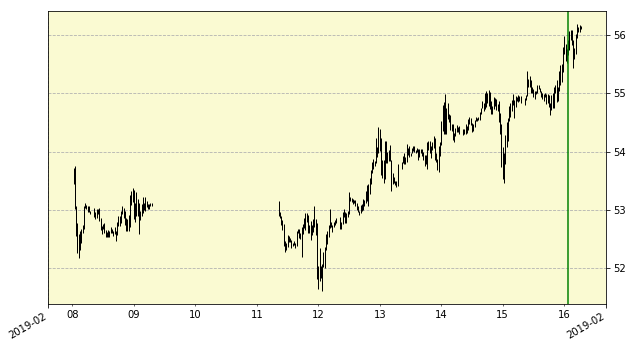

In [14]:
products['CL'].plot(period='minute')

In [22]:
db.close()

In [3]:
tbl = db.root['ADH19']

In [4]:
tbl.read_sorted(1549980000, sortby='date')

TypeError: read_sorted() got multiple values for argument 'sortby'

In [7]:
p=products['AD']

In [10]:
max([c.lastdate_in_db() for c in p.values()])

1550298600

In [8]:
data[data['date']>=1549900800]

array([(1549900800, 0.7106, 0.7109, 0.7104, 0.7108,  1491),
       (1549902600, 0.7107, 0.7109, 0.7101, 0.7104,  1642),
       (1549904400, 0.7104, 0.7105, 0.7097, 0.71  ,  1609),
       (1549906200, 0.7101, 0.7103, 0.7094, 0.7097,  2115),
       (1549908000, 0.7097, 0.7099, 0.7091, 0.7093,  2319),
       (1549909800, 0.7093, 0.7096, 0.7088, 0.7092,  2455),
       (1549911600, 0.7092, 0.7093, 0.7086, 0.7087,  1643),
       (1549913400, 0.7087, 0.709 , 0.7085, 0.7088,  1242),
       (1549915200, 0.7088, 0.709 , 0.7087, 0.7088,  1029),
       (1549917000, 0.7088, 0.7091, 0.7087, 0.7089,  1457),
       (1549918800, 0.7089, 0.7092, 0.7085, 0.7085,  1242),
       (1549920600, 0.7086, 0.7086, 0.7076, 0.7078,  2483),
       (1549922400, 0.7077, 0.708 , 0.7074, 0.7078,  2965),
       (1549924200, 0.7078, 0.7088, 0.7071, 0.7075,  5094),
       (1549926000, 0.7076, 0.7081, 0.7074, 0.7077,  2145),
       (1549927800, 0.7077, 0.708 , 0.7068, 0.7071,  4704),
       (1549929600, 0.707 , 0.7077, 0.70

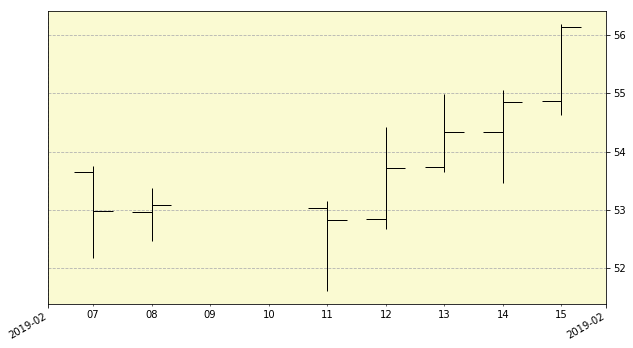

In [6]:
view(products['CL'].ohlc(period='day'), period='day')

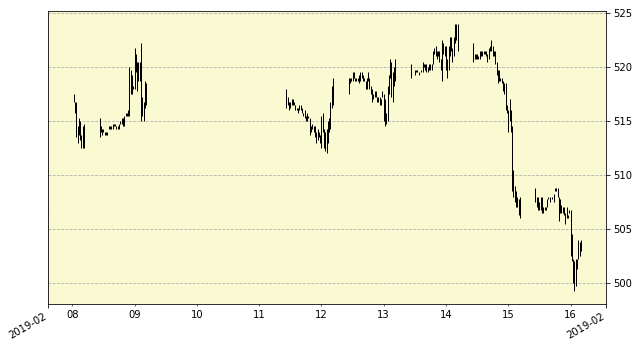

In [17]:
view(products['ZW'].ohlc(period='minute'), period='minute')

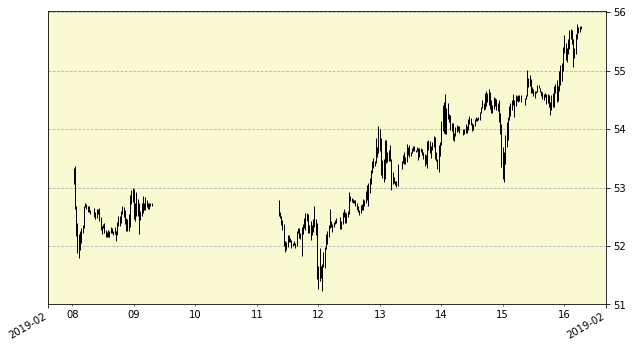

In [6]:
view(p['CLH19'].ohlc())

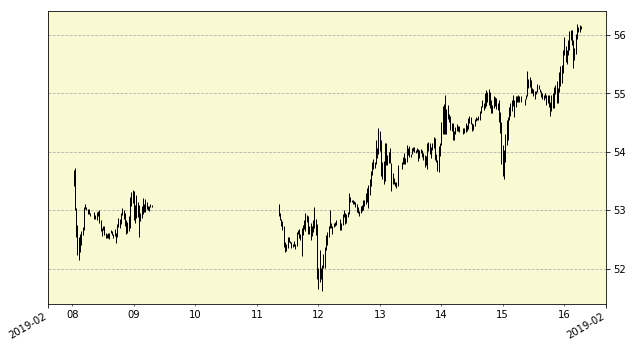

In [7]:
view(p['CLJ19'].ohlc())